## [1] Importing Modules and Reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
training_data = pd.read_csv('/content/training.csv')
test_data = pd.read_csv('/content/test.csv')
validation_data = pd.read_csv('/content/validation.csv')


Training Data

In [ ]:
training_data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
training_data['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

In [ ]:
training_data.shape

(16000, 2)

In [ ]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
training_data['description'] = training_data['label'].map(labels_dict)
training_data.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
training_data.groupby(["description","label"]).size()

description  label
anger        3        2159
fear         4        1937
joy          1        5362
love         2        1304
sadness      0        4666
surprise     5         572
dtype: int64

Test Data

In [ ]:
test_data

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


Validation Data

In [ ]:
validation_data

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


## [2] Data Exploration and EDA

Illustrating the distribution of emotion labels in the training data by counting the occurrences of each label.

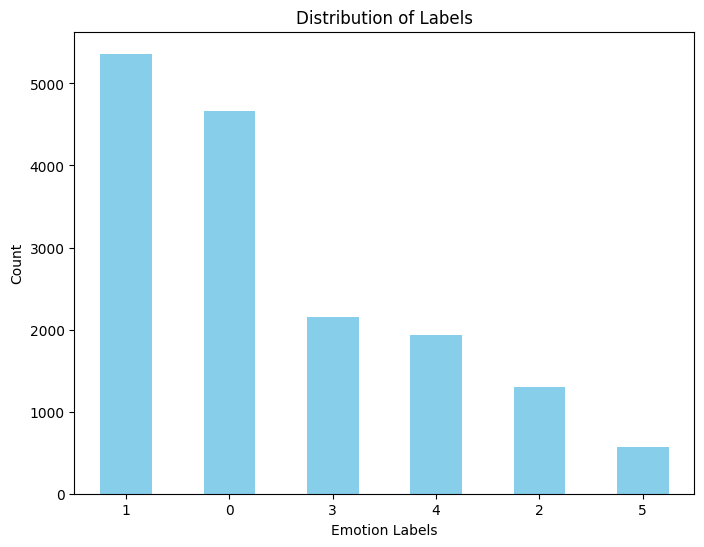

In [ ]:
label_counts = training_data['label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* Emotion 1 coming in the first place with the highest count.

* Emotion 5 coming in the last place with the least count.




Calculating and visualizes the distribution of text lengths for different emotion labels in the training data

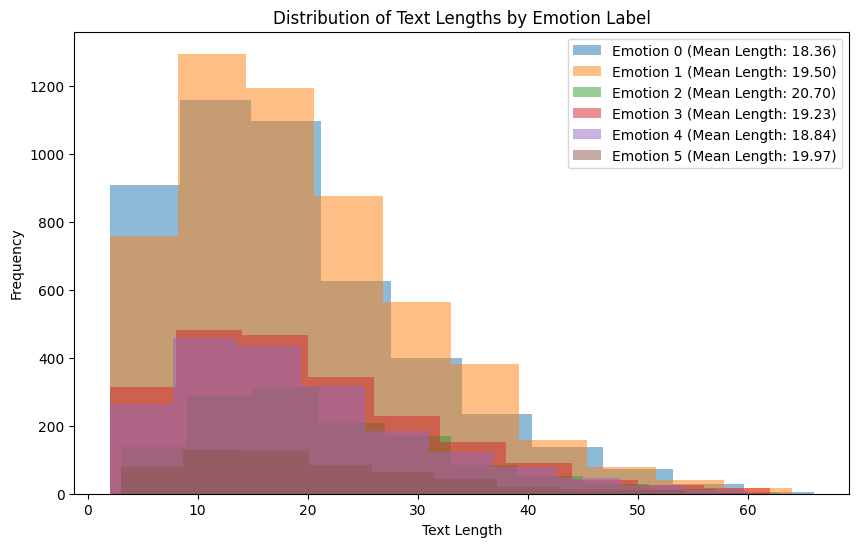

In [ ]:
training_data['text_length'] = training_data['text'].apply(lambda x: len(x.split()))

mean_text_length_by_label = training_data.groupby('label')['text_length'].mean()


plt.figure(figsize=(10, 6))
for label, mean_length in mean_text_length_by_label.items():
    plt.hist(training_data[training_data['label'] == label]['text_length'], alpha=0.5, label=f'Emotion {label} (Mean Length: {mean_length:.2f})')

plt.title('Distribution of Text Lengths by Emotion Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Emotion 2 has the highest mean length with a value = 20.70

## [3] PreProcessing

Importing the Natural Language Toolkit (NLTK) library and downloading the stopwords corpus, which contains common words like "the," "is," and "in," typically filtered out during text analysis tasks.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Printing a list of common English stopwords, such as "the," "is," and "in," which are frequently filtered out during text processing tasks like natural language processing.

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

lemmatizer = WordNetLemmatizer()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
training_data.head()

,text,label,description,text_length
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [ ]:
!pip install contractions

In [ ]:
import contractions

Preprocessing the text data in the "text" column of the training dataset, removing non-alphabetic characters, converting text to lowercase, removing stopwords, and storing the processed text in a list called "corpus".

In [ ]:

training_corpus = []

for i in range(len(training_data)):
    s = re.sub('[^a-zA-Z]', ' ', training_data['text'][i])
    s = contractions.fix(s)
    s = s.lower()
    s = s.split()
    s = [word for word in s if not word in stopwords.words('english')]
    s = [lemmatizer.lemmatize(word) for word in s]
    s = ' '.join(s)

    training_corpus.append(s)

training_corpus


['feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'feeling little burdened lately sure',
 'taking milligram time recommended amount fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vintage barbie doll sixty',
 'feel co

Preprocessing the text data in the "text" column of the validation dataset similarly to the training and test datasets, removing non-alphabetic characters, converting text to lowercase, removing stopwords, stemming words using the PorterStemmer, and storing the processed text in a list called "validation_corpus".

In [ ]:
validation_corpus = []

for i in range(len(validation_data)):
    s = re.sub('[^a-zA-Z]', ' ', validation_data['text'][i])
    s = contractions.fix(s)

    s = s.lower()
    s = s.split()
    s = [word for word in s if not word in stopwords.words('english')]
    s = [lemmatizer.lemmatize(word) for word in s]
    s = ' '.join(s)

    validation_corpus.append(s)

validation_corpus


['feeling quite sad sorry ill snap soon',
 'feel like still looking blank canvas blank piece paper',
 'feel like faithful servant',
 'feeling cranky blue',
 'treat feeling festive',
 'start feel appreciative god done',
 'feeling confident able take care baby',
 'feel incredibly lucky able talk',
 'feel le keen army every day',
 'feel dirty ashamed saying',
 'feel bitchy defeated yet',
 'dribbling mum coffee table looking window feeling happy',
 'woke often got around feeling pukey radiation groggy',
 'feeling sentimental',
 'walked hour fifteen minute later feeling like beaten stick placed rack stretched',
 'never stop feeling thankful compare others considered lucky encounter ruthless pirate witness slaughter others',
 'feel abused quite honestly made day little better',
 'know feel like stressed glaring squeezed soap onto sponge',
 'also loved could really feel desperation sequence especially liked emotion knight squire together similar fashion batman robin long time',
 'lunch old fr

Preprocessing the text data in the "text" column of the test dataset in a similar manner to the training data, removing non-alphabetic characters, converting text to lowercase, removing stopwords, stemming words using the PorterStemmer, and storing the processed text in a list called "test_corpus".

In [ ]:
test_corpus = []

for i in range(len(test_data)):
    s = re.sub('[^a-zA-Z]', ' ', test_data['text'][i])
    s = contractions.fix(s)

    s = s.lower()
    s = s.split()
    s = [word for word in s if not word in stopwords.words('english')]
    s = [lemmatizer.lemmatize(word) for word in s]
    s = ' '.join(s)
    test_corpus.append(s)

test_corpus


['feeling rather rotten ambitious right',
 'updating blog feel shitty',
 'never make separate ever want feel like ashamed',
 'left bouquet red yellow tulip arm feeling slightly optimistic arrived',
 'feeling little vain one',
 'cannot walk shop anywhere feel uncomfortable',
 'felt anger end telephone call',
 'explain clung relationship boy many way immature uncommitted despite excitement feeling getting accepted master program university virginia',
 'like breathless feeling reader eager see happen next',
 'jest feel grumpy tired pre menstrual probably week fit walrus vacation summer',
 'feel particularly agitated',
 'feel beautifully emotional knowing woman knew handful holding baba journey',
 'pay attention deepens feeling invaded helpless',
 'feel extremely comfortable group people even need hide',
 'find odd position feeling supportive',
 'feeling heartbroken sure katniss',
 'feel little mellow today',
 'feel like role would tear sail pessimism discontent',
 'feel bcoz fight get mad

Importing the TfidfVectorizer class, which is used to convert a collection of raw documents into a matrix of TF-IDF features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

Fitting the TfidfVectorizer to the "corpus" data, transforming it into a TF-IDF matrix and storing it in the variable "x_train2".

In [ ]:
x_train2 = tfidf_vectorizer.fit_transform(training_corpus)

Transforming the validation text corpus into a TF-IDF matrix using the pre-fitted TF-IDF vectorizer

In [ ]:
x_validation2=tfidf_vectorizer.transform(validation_corpus)

Transforming the first document in the test corpus into a TF-IDF representation using the pre-fitted TF-IDF vectorizer.

In [ ]:
x_test2=tfidf_vectorizer.transform(test_corpus)


In [ ]:
import joblib


model = tfidf_vectorizer


joblib.dump(model, 'tf_filename.joblib')

['tf_filename.joblib']

Extracting the emotion labels from the "label" column of the training data and assigns them to the variable "y_train".

In [ ]:
y_train = training_data['label']

In [ ]:
y_train

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

Extracting the emotion labels from the "label" column of the test and validation datasets respectively, assigning them to variables "y_test" and "y_validation".

In [ ]:
y_test=test_data['label']
y_validation=validation_data['label']

Training a logistic regression model using the TF-IDF transformed training data, predicting emotion labels for the validation data, and evaluating the model's performance by calculating accuracy and generating a classification report.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression = LogisticRegression()


logistic_regression.fit(x_train2, y_train)

y_pred_val = logistic_regression.predict(x_validation2)

accuracy_val = accuracy_score(y_validation, y_pred_val)
report_val = classification_report(y_validation, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:\n", report_val)


Validation Accuracy: 0.8735
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       550
           1       0.86      0.95      0.90       704
           2       0.88      0.70      0.78       178
           3       0.90      0.83      0.87       275
           4       0.86      0.77      0.81       212
           5       0.90      0.58      0.71        81

    accuracy                           0.87      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.87      0.87      0.87      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy is 85.5%

In [ ]:
import scipy.sparse as sp

x_merged = sp.vstack([x_train2, x_validation2])


y_merged = pd.concat([y_train, y_validation], ignore_index=False)


Predicting & Evaluating on Test Data & Validation Data Merged together


In [ ]:
logistic_regression.fit(x_merged, y_merged)

y_pred_test = logistic_regression.predict(x_test2)

accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)
print("Test Classification Report:\n", report_test)


Test Accuracy: 0.876
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       581
           1       0.86      0.96      0.91       695
           2       0.83      0.64      0.72       159
           3       0.88      0.85      0.86       275
           4       0.89      0.79      0.83       224
           5       0.90      0.55      0.68        66

    accuracy                           0.88      2000
   macro avg       0.88      0.78      0.82      2000
weighted avg       0.88      0.88      0.87      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy is 84.85%

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

Training a Support Vector Machine (SVM) classifier with a linear kernel using the TF-IDF transformed training data, predicting emotion labels for the validation data, and evaluating its performance by calculating accuracy.

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(x_train2, y_train)

y_pred_val = svm_classifier.predict(x_validation2)

from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_validation, y_pred_val)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.893


Validation Accuracy is 87.5%

In [ ]:
svm_classifier.fit(x_merged, y_merged)

y_pred_test = svm_classifier.predict(x_test2)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.89


Predicting emotion labels for the test data using the trained SVM classifier and calculates its accuracy as a measure of performance on the test set.

Test Accuracy 86.85%

Training a Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel using the TF-IDF transformed training data, predicting emotion labels for the validation data, and evaluating its performance by calculating accuracy.

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf')

svm_classifier.fit(x_train2, y_train)

y_pred_val = svm_classifier.predict(x_validation2)

from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_validation, y_pred_val)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.869


Validation Accuracy is 84.2%

Predicting emotion labels for the test data using the trained SVM classifier with an RBF kernel and calculates its accuracy as a measure of performance on the test set.

In [ ]:
y_pred_test = svm_classifier.predict(x_test2)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9773888888888889


Test Accuracy is 84.1%

Training a Support Vector Machine (SVM) classifier with a sigmoid kernel using the TF-IDF transformed training data, predicting emotion labels for the validation data, and evaluating its performance by calculating accuracy.

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='sigmoid')

svm_classifier.fit(x_train2, y_train)

y_pred_val = svm_classifier.predict(x_validation2)

from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_validation, y_pred_val)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.8915


Validation Accuracy is 87.1%

In [ ]:
svm_classifier.fit(x_merged, y_merged)

y_pred_test = svm_classifier.predict(x_test2)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.887


Predicting emotion labels for the test data using the trained SVM classifier with a sigmoid kernel and calculating its accuracy as a measure of performance on the test set.

Test Accuracy is 87.05%

Tuning the hyperparameters of a RandomForestClassifier using GridSearchCV to find the combination that maximizes accuracy on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train2, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Training a Gradient Boosting Classifier on training data

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

GBmodel = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=6
)

GBmodel.fit(x_train2, y_train)

y_pred_validation = GBmodel.predict(x_validation2)

accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Validation Accuracy:", accuracy_validation)

Validation Accuracy: 0.9055


In [ ]:
GBmodel.fit(x_merged, y_merged)

y_pred_test = GBmodel.predict(x_test2)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("test Accuracy:", accuracy_test)


test Accuracy: 0.9005


In [ ]:
import joblib


model = GBmodel


joblib.dump(GBmodel, 'model_filename.joblib')

['model_filename.joblib']

In [ ]:
print("Before preprocessing:")
print("x_train2 shape:", x_train2.shape)
print("y_train shape:", y_train.shape)
print("x_validation2 shape:", x_validation2.shape)
print("y_validation shape:", y_validation.shape)
print("x_test2 shape:", x_test2.shape)
print("y_test shape:", y_test.shape)

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train_dense = x_train2.toarray()
X_validation_dense = x_validation2.toarray()
X_test_dense = x_test2.toarray()

X_train_lstm = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_validation_lstm = X_validation_dense.reshape(X_validation_dense.shape[0], 1, X_validation_dense.shape[1])
X_test_lstm = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

num_classes = 6
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_validation_encoded = to_categorical(y_validation, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    GRU(units=64, return_sequences=True, input_shape=(1, X_train_dense.shape[1])),
    Dropout(0.4),
    GRU(units=32),
    Dropout(0.4),
    Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_lstm, y_train_encoded, epochs=50, batch_size=32,
                    validation_data=(X_validation_lstm, y_validation_encoded),
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
500/500 [==============================] - 10s 9ms/step - loss: 1.2717 - accuracy: 0.5232 - val_loss: 0.6535 - val_accuracy: 0.7860
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 0.4245 - accuracy: 0.8619 - val_loss: 0.3871 - val_accuracy: 0.8780
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 0.1961 - accuracy: 0.9449 - val_loss: 0.3650 - val_accuracy: 0.8865
Epoch 4/50
500/500 [==============================] - 3s 7ms/step - loss: 0.1253 - accuracy: 0.9638 - val_loss: 0.3831 - val_accuracy: 0.8870
Epoch 5/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0908 - accuracy: 0.9743 - val_loss: 0.4260 - val_accuracy: 0.8805
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0772 - accuracy: 0.9795 - val_loss: 0.4532 - val_accuracy: 0.8775
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0638 - accuracy: 0.9824 - val_loss: 0.5131 - val_accuracy: 0.8745
Epoch

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

def create_model(optimizer='adam', dropout_rate=0.4):
    model = Sequential([
        GRU(units=64, return_sequences=True, input_shape=(1, X_train_dense.shape[1])),
        Dropout(dropout_rate),
        GRU(units=32),
        Dropout(dropout_rate),
        Dense(units=num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.3, 0.4, 0.5]
}

best_score = 0
best_params = {}

for optimizer in param_grid['optimizer']:
    for dropout_rate in param_grid['dropout_rate']:
        model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(X_train_lstm, y_train_encoded, epochs=50, batch_size=32,
                            validation_data=(X_validation_lstm, y_validation_encoded),
                            callbacks=[early_stopping], verbose=0)

        val_loss, val_accuracy = model.evaluate(X_validation_lstm, y_validation_encoded, verbose=0)

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print("Best Validation Accuracy:", best_score)
print("Best Parameters:", best_params)


Best Validation Accuracy: 0.9014999866485596
Best Parameters: {'optimizer': 'rmsprop', 'dropout_rate': 0.4}


In [ ]:
best_optimizer = best_params['optimizer']
best_dropout_rate = best_params['dropout_rate']


best_model = create_model(optimizer=best_optimizer, dropout_rate=best_dropout_rate)

X_train_validation_lstm = np.concatenate((X_train_lstm, X_validation_lstm), axis=0)
y_train_validation_encoded = np.concatenate((y_train_encoded, y_validation_encoded), axis=0)


final_history = best_model.fit(X_train_validation_lstm, y_train_validation_encoded, epochs=50, batch_size=32,
                                verbose=0)





test_loss, test_accuracy = best_model.evaluate(X_test_lstm, y_test_encoded, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 0.4219304919242859
Test Accuracy: 0.8820000290870667


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

def create_model(optimizer='adam', dropout_rate=0.4):
    model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=(1, X_train_dense.shape[1])),
        Dropout(dropout_rate),
        LSTM(units=32),
        Dropout(dropout_rate),
        Dense(units=num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.3, 0.4, 0.5]
}

best_score = 0
best_params = {}

for optimizer in param_grid['optimizer']:
    for dropout_rate in param_grid['dropout_rate']:
        model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(X_train_lstm, y_train_encoded, epochs=50, batch_size=32,
                            validation_data=(X_validation_lstm, y_validation_encoded),
                            callbacks=[early_stopping], verbose=0)

        val_loss, val_accuracy = model.evaluate(X_validation_lstm, y_validation_encoded, verbose=0)

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print("Best Validation Accuracy:", best_score)
print("Best Parameters:", best_params)


Best Validation Accuracy: 0.8989999890327454
Best Parameters: {'optimizer': 'rmsprop', 'dropout_rate': 0.4}


In [ ]:
best_optimizer = best_params['optimizer']
best_dropout_rate = best_params['dropout_rate']

final_model = create_model(optimizer=best_optimizer, dropout_rate=best_dropout_rate)

X_train_validation_lstm = np.concatenate((X_train_lstm, X_validation_lstm), axis=0)
y_train_validation_encoded = np.concatenate((y_train_encoded, y_validation_encoded), axis=0)


final_history = final_model.fit(X_train_validation_lstm, y_train_validation_encoded, epochs=50, batch_size=32,
                                verbose=0)

test_loss, test_accuracy = final_model.evaluate(X_test_lstm, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
